# Lab 1

In [1]:
# Import the libraries we'll use below.
import numpy as np
import matplotlib.pyplot as plt

## Data as matrices
Data usually comes in the form of matrices. The Python Numpy library makes it easy to manipulate matrices efficiently. See the [Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html) for details.

In [2]:
# Print these to make sure you understand what is being generated.
A = np.array([1, 2, 3])
B = np.arange(1, 13).reshape(3, 4)
C = np.ones((2, 3))
D = np.eye(3)

In [3]:
A

array([1, 2, 3])

In [4]:
B

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [5]:
C

array([[1., 1., 1.],
       [1., 1., 1.]])

In [6]:
D

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

---
### Exercise 1: Matrix manipulation (8 points)

Perform the following computations using numpy functions and print the results. Note that the `*` operator implies matrix multiplication -- make sure the dimensions align!
1. 2A + 1
2. Sum the rows of B
3. Sum the columns of B
4. Number of elements of B greater than 5
5. C + C
6. A * B
7. (B * B) - D

In [7]:
# 1. 2A + 1 (expressed with equivalent calls)
print("Version 1:", 2*A + 1)
print("Version 2:", np.multiply(A, 2) + 1)
print("Version 3:", np.add(np.multiply(A, 2), 1))

Version 1: [3 5 7]
Version 2: [3 5 7]
Version 3: [3 5 7]


In [8]:
# 2. Sum the rows of B
np.sum(B, axis=1)

array([10, 26, 42])

In [9]:
# 3. Sum the columns of B
np.sum(B, axis=0)

array([15, 18, 21, 24])

In [10]:
# 4. The number of elements of B greater than 5
np.count_nonzero(B>5)

7

In [11]:
# 5. C + C (expressed with equivalent calls)
print("Version 1:\n", C + C)
print("Version 2:\n", np.add(C, C))
print("Version 3:\n", C * 2)
print("Version 4:\n", np.multiply(C, 2))

Version 1:
 [[2. 2. 2.]
 [2. 2. 2.]]
Version 2:
 [[2. 2. 2.]
 [2. 2. 2.]]
Version 3:
 [[2. 2. 2.]
 [2. 2. 2.]]
Version 4:
 [[2. 2. 2.]
 [2. 2. 2.]]


In [12]:
# 6. A * B (matrix multiplication) (equivalent expressions)
print ("Version 1:", A @ B)
print ("Version 2:", np.matmul(A,B))

Version 1: [38 44 50 56]
Version 2: [38 44 50 56]


In [13]:
# 7. (B * B) - D
# Having Problems here as B cannot be multiplied by itself.
# However, B can be multplied by it's transpose which
# yields a matix from which D can be subtracted.
# (equivalent expressions presented)
print ("Version 1:\n", np.matmul(B, B.T) - D)
print ("Version 2:\n", B @ B.T - D)

Version 1:
 [[ 29.  70. 110.]
 [ 70. 173. 278.]
 [110. 278. 445.]]
Version 2:
 [[ 29.  70. 110.]
 [ 70. 173. 278.]
 [110. 278. 445.]]


## Data for Supervised Learning
Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

In [14]:
def create_1d_data(num_examples=10, w=2, b=1, random_scale=1):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    random_scale: add uniform noise between -random_scale and +random_scale

  Returns:
    X and Y with shape (num_examples)
  """
  X = np.arange(num_examples)
  np.random.seed(4)  # consistent random number generation
  deltas = np.random.uniform(low=-random_scale, high=random_scale, size=X.shape)
  Y = b + deltas + w * X
  return X, Y

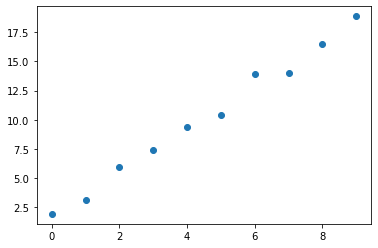

In [15]:
# Create some artificial data using create_1d_data.
X, Y = create_1d_data()
plt.scatter(X, Y)
plt.show()

---
### Exercise 2: Models for Data (8 points)

A model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = x+5$ 
2. $M_2(x) = 2x+1$

Compute the predictions of models $M_1$ and $M_2$ for the values in $X$. These predictions should be vectors of the same shape as $Y$. Then plot the prediction lines of these two models overlayed on the "observed" data $(X, Y)$. Use [plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to draw the lines.

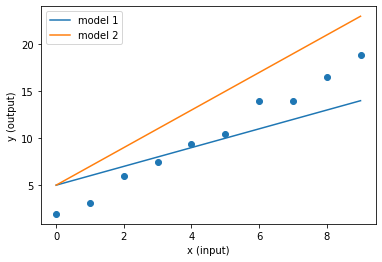

In [17]:
def model_1(x): return x + 5
def model_2(x): return 2*x + 5

M1 = model_1(X)
M2 = model_2(X)

plt.scatter(X, Y)
plt.plot(X, M1, label="model 1")
plt.plot(X, M2, label="model 2")
plt.xlabel("x (input)")
plt.ylabel("y (output)")
plt.legend(loc="upper left")
plt.show()

## Evaluation Metrics

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{|Y|} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

---
### Exercise 3: Computing MSE (8 points)

Write a function for computing the MSE metric and use it to compute the MSE for the two models above, $M_1$ and $M_2$.

In [18]:
def MSE(true_values, predicted_values):
  """Return the MSE between true_values and predicted values."""
  return(np.mean((true_values - predicted_values) ** 2))

In [19]:
print ('MSE for M1:', MSE(Y, M1))
print ('MSE for M2:', MSE(Y, M2))

MSE for M1: 6.839502909434264
MSE for M2: 15.200841736547588


---

## Generalization

Our data $(X, Y)$ represents just a sample of all possible input-output pairs we might care about. A model will be useful to the extent we can apply it to new inputs. Consider the more complex model below, which appears to produce a much smaller mean squared error.

MSE for M3: 0.10941956925516369


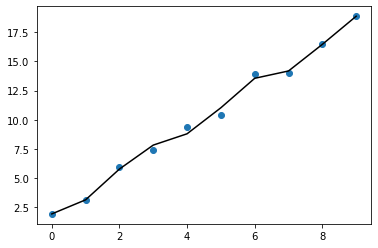

In [20]:
# Fit an 8-th degree polynomial to (X, Y). See np.polyfit for details.
polynomial_model_coefficients = np.polyfit(X, Y, deg=8)
polynomial_model = np.poly1d(polynomial_model_coefficients)
M3 = polynomial_model(X)
fig = plt.scatter(X, Y)
plt.plot(X, M3, '-k')
print ('MSE for M3:', MSE(Y, M3))

---
### Exercise 4: Generalization (8 points)

Explain whether you expect $M_3$ to be better than $M_2$ at predicting the labels for new unseen inputs.

$M_3$ is an example of over fitting.  It has, in effect, memorized the inputs in our training set.  Our data set was generated from a linear model with limited noise added.  Ignoring the noise, the slope of our true data is 2 and the intercept is 1.  At every point, $M_2$ is expected to be off by approximately 4, so the MSE should be roughly 16 subject to the effect of the random noise for any data set.  On the other hand, $M_3$, a degree 8 polynomial, is not linear and I do not expect it to be better than $M_2$ at predicting the labels for unseen inputs.

Let's take a look.

We use create_ld_data to get a set of thirteen data points (which happens to include the first ten from our original set).  Normally we would separate the first set (our training set) from the second set, but we aren't going to do so here as that separation is not needed to illustrate the point.  As the plot below demonstrates, the $M_3$ predictions for unseen inputs are not very good at all.  The meaningful divergence begins with the first previously unseen point $(X=10)$ and grows from there.

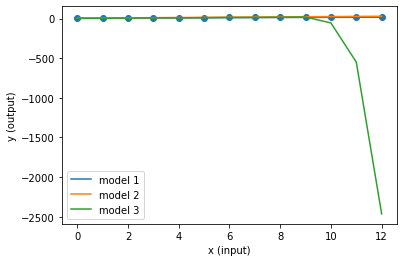

MSE for M1: 17.573541363552
MSE for M2: 15.059406964183482
MSE for M3: 502625.90297228924


In [21]:
X_prime, Y_prime = create_1d_data(13)
M1 = model_1(X_prime)
M2 = model_2(X_prime)
M3 = polynomial_model(X_prime)

plt.scatter(X_prime, Y_prime)
plt.plot(X_prime, M1, label="model 1")
plt.plot(X_prime, M2, label="model 2")
plt.plot(X_prime, M3, label="model 3")
plt.xlabel("x (input)")
plt.ylabel("y (output)")
plt.legend(loc="lower left")
plt.show()

print("MSE for M1:", MSE(Y_prime,M1))
print("MSE for M2:", MSE(Y_prime,M2))
print("MSE for M3:", MSE(Y_prime,M3))

---

## Review

* In **Supervised Machine Learning**, we must start with data in the form $(X,Y)$ where $X$ are the inputs and $Y$ are the output labels.
* A **model** is a function that maps an input $x$ to an output $y$. The model's output is referred to as a **prediction**, denoted by $\hat{y}$.
* We **evaluate** predictions by comparing them to the true labels. This measurement is called a **loss** or **error**. For real-valued data, **mean squared error** is a common metric.
* A model is only as good as its ability to **generalize** to new examples.